### ¿QUÉ ES K-MEANS?

k-Means es un algoritmo de aprendizaje no supervisado que **agrupa datos en k clústeres** basándose en la similitud entre ellos. Funciona asignando puntos a los centroides más cercanos y ajustando estos centroides iterativamente hasta encontrar la mejor agrupación.

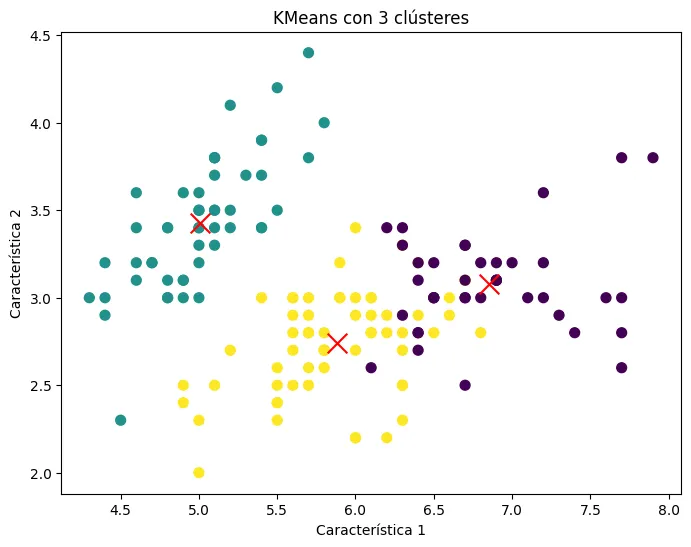

Este algoritmo se usa para segmentación de clientes en marketing, compresión de imágenes (reducción de colores), agrupamiento de documentos o textos o detección de patrones en datos sin etiquetas.

Un **clúster** es un grupo de datos que comparten similitudes entre sí y son diferentes a los datos de otros grupos. En términos simples, el **clustering** es una técnica que nos permite organizar datos sin etiquetas en grupos significativos.

- Cada clúster tiene un **centroide** (un punto representativo del grupo).
- Los puntos de datos en el mismo clúster son **más similares** entre sí que con los de otros clústeres.

Existen diferentes enfoques para agrupar datos:

1. **Particional (como k-Means):** Divide los datos en **k grupos** basándose en la distancia a los centroides.
2. **Jerárquico:** Crea una estructura en forma de árbol para definir los grupos.
3. **Basado en densidad (como DBSCAN):** Agrupa puntos densamente conectados y detecta outliers.

### **¿CÓMO K-MEANS ASIGNA PUNTOS A CENTROIDES Y LOS RECALCULA?**

El algoritmo **k-Means** funciona en dos pasos:

1. **Asignación de puntos a centroides** (Agrupación)
2. **Recalculación de centroides** (Actualización)

Se repite hasta que los centroides dejan de cambiar significativamente.

| Paso                                  | Desarrollo                                                                                                         | Ejemplo                                                                                                 | Consideraciones                                                                                               |
| ------------------------------------- | ------------------------------------------------------------------------------------------------------------------ | ------------------------------------------------------------------------------------------------------- | ------------------------------------------------------------------------------------------------------------- |
| 1\. Inicialización de centroides      | Se seleccionan aleatoriamente k puntos en el espacio de datos como los centroides iniciales.                       | Si k=3, se eligen 3 puntos al azar en el espacio de datos.                                              | La elección aleatoria puede afectar el resultado. Se recomienda usar k-Means++ para una mejor inicialización. |
| 2\. Asignación de puntos a centroides | Cada punto se asigna al centroide más cercano usando la distancia euclidiana.                                      | Si un punto está más cerca del centroide rojo que del azul o verde, se asigna al clúster rojo.          | Un mal número de k puede llevar a grupos incorrectos. Hay que probar distintos valores.                       |
| 3\. Recalculación de centroides       | Se actualizan los centroides tomando el promedio de los puntos asignados a cada clúster.                           | Si un clúster tiene los puntos (2,3)(2,3), (3,4)(3,4) y (4,5)(4,5), el nuevo centroide será (3,4)(3,4). | En cada iteración, los centroides se mueven, reorganizando los grupos.                                        |
| 4\. Repetición del proceso            | Se repiten los pasos 2 y 3 hasta que los centroides dejen de moverse o se alcance un número máximo de iteraciones. | Si los centroides ya no cambian en la iteración 10, el algoritmo se detiene.                            | Puede ser necesario establecer un límite de iteraciones para evitar bucles innecesarios.                      |

### SINTAXIS BÁSICA CON SCIKIT LEARN

[[-0.05021989 -0.8812048   0.34773781  0.2815273 ]
 [-1.01457897  0.82794104 -1.30498732 -1.25489349]
 [ 1.13597027  0.08842168  0.99615451  1.01752612]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0
 0 2 2 2 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 2 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
135.03727426139685


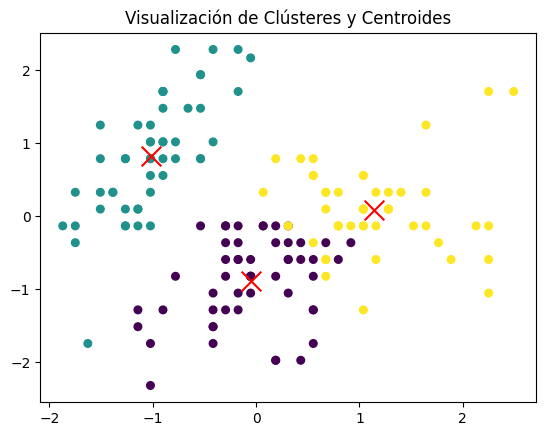

In [42]:
# Importamos el algoritmo K-Means
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Cargamos el dataset de iris y creamos un dataframe a partir de el
iris = load_iris()
# Definimos las características de las clases del dataset
X = iris.data
y = iris.target # Definimos el target (Aunque no lo usaremos en el clustering)

# Escalamos las columnas del dataframe
scaler = StandardScaler()
X_scaled  = scaler.fit_transform(X)

# 2. Gestión de outliers (usaremos el rango intercuartílico para detectar outliers)
Q1 = np.percentile(X_scaled , 25, axis=0)
Q3 = np.percentile(X_scaled , 75, axis=0)
IQR = Q3 - Q1
outliers_condition = ((X_scaled  < (Q1 - 1.5 * IQR)) | (X_scaled  > (Q3 + 1.5 * IQR)))

# Sustituir outliers con los valores más cercanos dentro del rango permitido
X_scaled_outliers_handled = np.copy(X_scaled)
for i in range(X_scaled.shape[1]):
    X_scaled_outliers_handled[:, i] = np.clip(X_scaled_outliers_handled[:, i],
                                              Q1[i] - 1.5 * IQR[i], Q3[i] + 1.5 * IQR[i])

# Creamos una instancia del modelo K-means
kmeans = KMeans(n_clusters=3,  # Número de clústeres que deseas
                init='k-means++',  # Método para inicializar los centroides (mejor para evitar puntos aleatorios)
                max_iter=300,  # Número máximo de iteraciones para la convergencia
                n_init=10,  # Número de veces que el algoritmo se ejecuta con diferentes centroides iniciales
                random_state=42)  # Asegura que los resultados sean reproducibles

# Entrenar el modelo
kmeans.fit(X_scaled_outliers_handled)  # X es tu conjunto de datos ya escalado. fit_predict(X): Ajusta el modelo y devuelve las etiquetas (clústeres) a las que cada punto pertenece. Es más eficiente si no necesitas separar el ajuste y la predicción.
labels = kmeans.fit_predict(X_scaled_outliers_handled) #predict(X): Predice el clúster al que pertenecerán nuevos puntos (después de haber entrenado el modelo).

# Ver los resultados del modelo
print(kmeans.cluster_centers_) # kmeans.cluster_centers_: Los centroides de los clústeres. Es un array que te muestra las coordenadas de cada centroide.
print(kmeans.labels_) # kmeans.labels_: Las etiquetas o clústeres asignados a cada punto de los datos. Esto te dice a qué clúster pertenece cada muestra.
print(kmeans.inertia_) # kmeans.inertia_: La suma de las distancias al cuadrado de cada punto a su centroide. Es una métrica que indica cuán compactos son los clústeres.

# Visualización
# Visualizar los puntos de datos
plt.scatter(X_scaled_outliers_handled[:, 0], X_scaled_outliers_handled[:, 1], c=kmeans.labels_, cmap='viridis', s=30)

# Visualizar los centroides
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200)

plt.title('Visualización de Clústeres y Centroides')
plt.show()


- `KMeans()`
    - **`n_clusters`**:
        
        Número de clústeres que el algoritmo debe encontrar en los datos. Este es un parámetro crucial que debes definir (lo que determina cuántos grupos deseas).
        
    - **`init`**:
        
        Método para inicializar los centroides.
        
        - **`'k-means++'`** (por defecto) es el más usado porque selecciona los centroides iniciales de manera inteligente para mejorar la convergencia.
        - **`'random'`**: selecciona los centroides de manera aleatoria.
    - **`max_iter`**:
        
        Número máximo de iteraciones que realizará el algoritmo para encontrar la solución final.
        
    - **`n_init`**:
        
        Número de veces que el algoritmo se ejecutará con diferentes inicializaciones de centroides. El resultado será el mejor de estas ejecuciones.
        
    - **`random_state`**:
        
        Semilla para controlar la aleatoriedad del algoritmo y garantizar que los resultados sean reproducibles.

Para el siguiente paso k-Means necesita que **el número de clústeres (k) sea elegido antes de ejecutarse**. Pero, ¿cómo sabemos cuál es el valor óptimo de k? El algoritmo **k-Means** requiere definir previamente el número de clústeres (**k**), pero elegir el valor correcto no siempre es trivial. Si se elige un **k** demasiado pequeño, los grupos pueden ser muy generales y mezclar datos distintos. Si **k** es demasiado grande, se pueden generar agrupaciones innecesarias y perder generalización.

Existen varios métodos para determinar el número óptimo de clústeres. Los dos más utilizados son:

- **1. Método del codo (Elbow Method)**
    
    Este método evalúa cómo varía la suma de los errores cuadráticos intra-clúster (WCSS - Within-Cluster Sum of Squares) al incrementar el número de clústeres.
    
    <aside>
    💡
    
    - **WCSS** mide la distancia entre los puntos de un clúster y su centroide.
    - A medida que **k aumenta**, WCSS disminuye porque los grupos son más pequeños y homogéneos.
    - Sin embargo, en algún punto, la reducción en WCSS se vuelve marginal y deja de justificar un **k** mayor.
    - El punto donde la disminución se estabiliza se conoce como el **codo** del gráfico.
    </aside>
    
    ### **Procedimiento**
    
    1. Ejecutar **k-Means p**ara diferentes valores de **k** (por ejemplo, de 1 a 10).
    2. Calcular WCSS para cada valor de **k**.
    3. Graficar WCSS en función de **k**.
    4. Identificar el punto donde la curva empieza a disminuir lentamente (el "codo").
    
    Por ejemplo, supongamos que ejecutamos k-Means en un conjunto de datos y obtenemos el siguiente WCSS:

    | k | WCSS |
    | - | ---- |
    | 1 | 1500 |
    | 2 | 900  |
    | 3 | 500  |
    | 4 | 300  |
    | 5 | 250  |
    | 6 | 240  |

    Si graficamos estos valores, el "codo" aparece en k = 3 o 4, ya que después de este punto la reducción en WCSS es mínima.

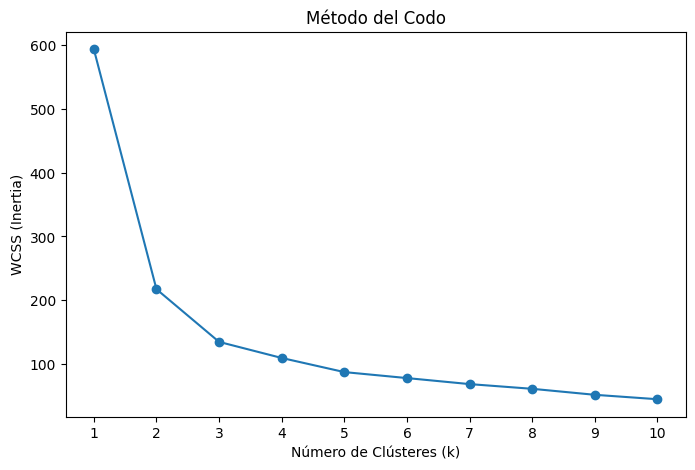

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generar un conjunto de datos artificial con clusters
# X, _ = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)

# Calcular la suma de los errores cuadráticos intra-clúster (WCSS)
wcss = []
k_values = range(1, 11)  # Probar valores de k desde 1 hasta 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled_outliers_handled)
    wcss.append(kmeans.inertia_)  # inertia_ almacena la WCSS

# Graficar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(k_values, wcss, marker='o', linestyle='-')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('WCSS (Inertia)')
plt.title('Método del Codo')
plt.xticks(k_values)
plt.show()

Podemos apreciar que a partir del 3 la diferencia entre los errores cuadráticos intra-clúster (WCSS) es miníma por lo que el nº óptimo de clusteres sería 3 (Lo cual tiene sentido ya que el dataset iris que hemos utilizado para el ejemplo posee 3 clases de flores diferentes).

- `make_blobs()`
    
    El método `make_blobs` es una función de scikit-learn que se utiliza para **generar un conjunto de datos sintético (ficticio) de puntos en el espacio**, con un número específico de clústeres. Es muy útil para probar y validar algoritmos de agrupación (como k-Means), ya que te permite controlar el número de clústeres, su dispersión y otras características sin necesidad de usar un conjunto de datos real.
    
    ### **Parámetros principales de `make_blobs`:**
    
    - **`n_samples`**:
        
        Número total de muestras (puntos de datos) a generar. Puede ser un solo número entero (para generar el mismo número de muestras para todos los clústeres) o una lista con la cantidad de muestras por clúster.
        
    - **`centers`**:
        
        El número de clústeres o las posiciones de los centroides en los que se agruparán los datos.
        
        - Si es un número entero, generará esa cantidad de clústeres con centroides aleatorios.
        - Si se proporciona una lista de coordenadas, esos serán los centroides exactos de los clústeres.
    - **`cluster_std`**:
        
        La desviación estándar de los clústeres, que controla qué tan dispersos estarán los puntos alrededor de sus centroides. Un valor más bajo significa que los puntos estarán más cerca de los centroides y un valor más alto hace que los puntos estén más dispersos.
        
    - **`random_state`**:
        
        Permite asegurar la reproducibilidad de los datos generados, es decir, generar siempre el mismo conjunto de datos con el mismo valor de `random_state`.
        
    - **`n_features`**:
        
        El número de características (dimensiones) de cada punto de datos. Si lo dejas en el valor predeterminado (`2`), los puntos estarán en un espacio bidimensional, pero puedes cambiarlo si deseas un espacio con más dimensiones.
        
    - **`shuffle`**:
        
        Si es **True**, mezcla los puntos generados de forma aleatoria. Si es **False**, mantiene el orden de los puntos generados. Por defecto es **True**.
        

### **Consideraciones**

- Este método es útil cuando hay una diferencia clara en la reducción de WCSS.
- En algunos casos, el codo no es evidente y se deben usar métodos complementarios.

- **2. Coeficiente de Silueta**
    
    Este método evalúa si están bien agrupados los puntos dentro de cada clúster comparando:
    
    1. La cohesión intra-clúster (lo cerca están los puntos de su centroide).
    2. La separación inter-clúster (qué tan lejos están de los otros clústeres).
    
    <aside>
    💡
    
    El coeficiente de silueta varía entre **-1 y 1**:
    
    - **Cercano a 1**: Los puntos están bien agrupados dentro de su clúster.
    - **Cercano a 0**: Los puntos están en el límite entre clústeres, lo que indica que k no es óptimo.
    - **Negativo**: Los puntos están asignados al clúster incorrecto.
    </aside>
    
    ### **Procedimiento**
    
    1. Ejecutar **k-Means** para distintos valores de **k**.
    2. Calcular el coeficiente de silueta para cada punto.
    3. Promediar los coeficientes y graficarlos en función de **k**.
    4. Elegir el **k** donde el coeficiente de silueta es máximo.
    
    Supongamos que probamos diferentes valores de **k** y obtenemos estos coeficientes:
    
    | k | Coeficiente de Silueta |
    | - | ---------------------- |
    | 2 | 0.45                   |
    | 3 | 0.55                   |
    | 4 | 0.62                   |
    | 5 | 0.48                   |
    | 6 | 0.43                   |

    Aquí, el mejor valor es k = 4 porque tiene el coeficiente de silueta más alto.

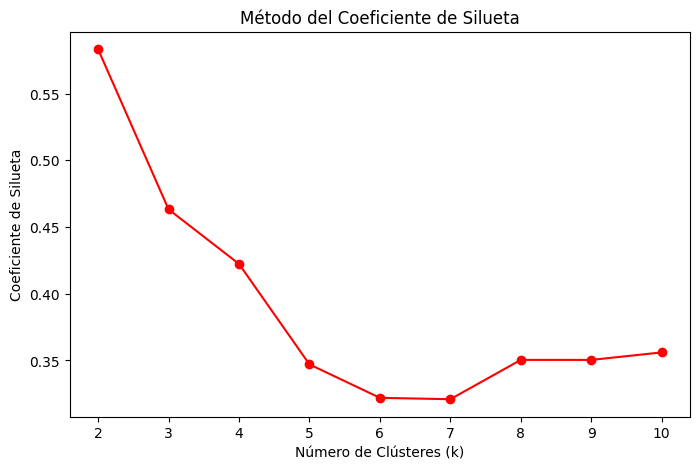

In [44]:
from sklearn.metrics import silhouette_score

silhouette_scores = []  # Almacenar los coeficientes de silueta

for k in range(2, 11):  # No se puede calcular silueta para k=1
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled_outliers_handled)  # Obtener las etiquetas asignadas a los puntos
    score = silhouette_score(X_scaled_outliers_handled, labels)  # Calcular el coeficiente de silueta
    silhouette_scores.append(score)

# Graficar el coeficiente de silueta en función de k
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='-', color='red')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Coeficiente de Silueta')
plt.title('Método del Coeficiente de Silueta')
plt.xticks(range(2, 11))
plt.show()


Apreciamos que el mejor nº de clusters según la puntuación sería 2, pero juntando estos resultados con el método del codo determinamos que el óptimo sería ``3``.

### **Consideraciones**

- Es útil cuando no hay un codo claro en la curva de WCSS.
- No siempre funciona bien en conjuntos de datos con estructuras muy complejas.

| Método                 | Ventajas                                                                    | Desventajas                                             |
| ---------------------- | --------------------------------------------------------------------------- | ------------------------------------------------------- |
| Método del codo        | Fácil de interpretar, útil para detectar cambios bruscos en la variabilidad | Puede ser subjetivo si el codo no es claro              |
| Coeficiente de silueta | Evalúa la calidad de la agrupación, no solo la dispersión                   | Puede ser menos preciso en datos con formas irregulares |

### Aplicamos configuraciones óptimas

Silhouette Score para el modelo con 3 clústeres: 0.48275167016872444


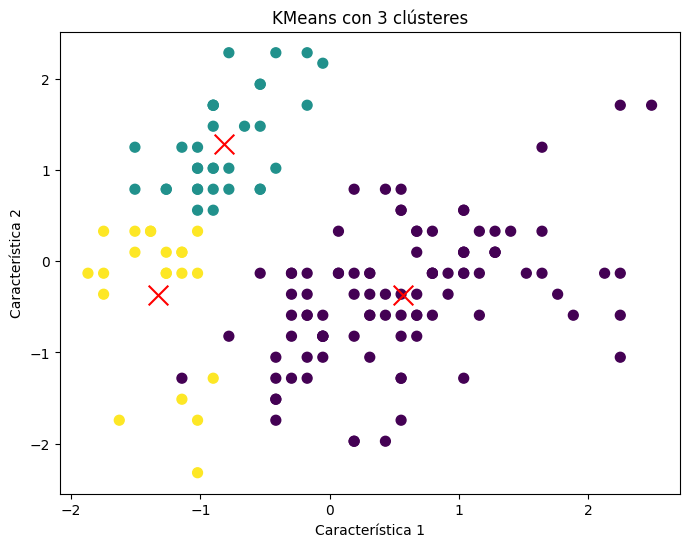

Número óptimo de clústeres según el Método del Codo y el Coeficiente de Silueta: 3
Centroides de los clústeres:
[[ 0.57100359 -0.37176778  0.69111943  0.66315198]
 [-0.81623084  1.28059159 -1.28683379 -1.2197118 ]
 [-1.32765367 -0.36765712 -1.13723572 -1.11486192]]


In [45]:
# A partir de la gráfica, elegimos el número óptimo de clústeres (suponemos k=3)
optimal_k = 3

# 5. Aplicar KMeans con el número óptimo de clústeres
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_scaled_outliers_handled)

# 6. Evaluación del modelo usando Silhouette Score con el número óptimo de clústeres
sil_score_optimal = silhouette_score(X_scaled_outliers_handled, kmeans.labels_)
print(f"Silhouette Score para el modelo con {optimal_k} clústeres: {sil_score_optimal}")

# 7. Visualizar los resultados de KMeans
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled_outliers_handled[:, 0], X_scaled_outliers_handled[:, 1], c=kmeans.labels_, cmap='viridis', s=50)  # Graficamos los puntos de datos coloreados por su clúster
centroids = kmeans.cluster_centers_  # Los centroides de los clústeres
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200)  # Graficamos los centroides en rojo
plt.title(f'KMeans con {optimal_k} clústeres')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.show()

# 8. Resultados finales
print(f'Número óptimo de clústeres según el Método del Codo y el Coeficiente de Silueta: {optimal_k}')
print('Centroides de los clústeres:')
print(kmeans.cluster_centers_)

## MÉTRICAS DE EVALUACIÓN
1. **Inercia** (Inertia/WCSS): La inercia es la suma de las distancias cuadradas entre cada punto y el centroide del clúster al que pertenece. Se usa comúnmente para determinar el número óptimo de clústeres a través del Método del Codo.

    - **Interpretación**: Un valor de inercia bajo sugiere que los puntos están cerca de sus centroides, indicando un buen clustering, pero siempre disminuirá a medida que aumente el número de clústeres, por lo que debe usarse en combinación con otras métricas.

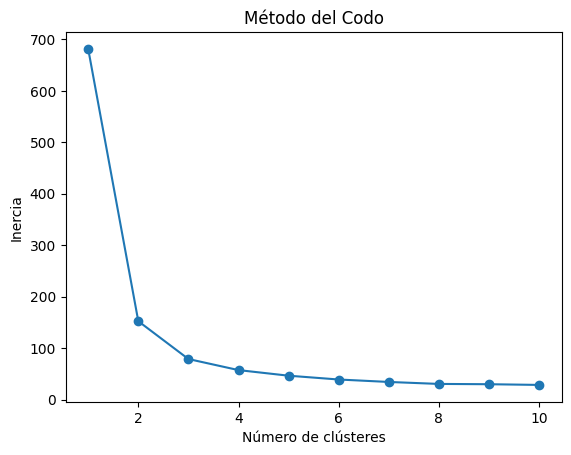

In [46]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Cargar el dataset Iris
data = load_iris()
X = data.data

# Evaluar la inercia para diferentes números de clústeres
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Graficar la inercia
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de clústeres')
plt.ylabel('Inercia')
plt.show()

2. **Silhouette Score**: Mide qué tan similar es un punto a su propio clúster en comparación con otros clústeres. Se calcula como la diferencia entre la distancia promedio dentro del clúster (a) y la distancia al clúster más cercano (b).

    - **Interpretación**: El valor varía de **1 a +1**:
        - **+1**: El punto está bien agrupado.
        - **0**: El punto está en el borde de dos clústeres.
        - **1**: El punto está mal agrupado.

In [47]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Crear modelo KMeans con k=3 (por ejemplo)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Calcular el Silhouette Score
sil_score = silhouette_score(X, kmeans.labels_)
print(f'Silhouette Score: {sil_score}')

Silhouette Score: 0.551191604619592


3. **Método del Codo**: Es una técnica para determinar el número óptimo de clústeres, observando la inercia para diferentes valores de k. El número óptimo se encuentra donde la disminución de la inercia comienza a desacelerarse (punto de inflexión). El Método del Codo depende de la inercia. Se puede usar la gráfica de inercia para encontrar el punto de inflexión.

4. **Homogeneidad, Completitud y V-Measur:**
    - **Homogeneidad**: Mide si los puntos dentro de un clúster pertenecen a la misma clase (etiqueta).
    - **Completitud**: Mide si todos los puntos de una clase están dentro del mismo clúster.
    - **V-Measure**: Combina homogeneidad y completitud en una sola métrica.
        - **Interpretación**:
            - **1**: Indica un buen clustering en términos de homogeneidad/completitud.
            - **0**: Indica que no hay coincidencia entre las etiquetas y los clústeres.

In [48]:
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score
from sklearn.cluster import KMeans

# Ejemplo con etiquetas verdaderas (se requiere tener etiquetas verdaderas)
# Cargar el conjunto de datos Iris, que tiene etiquetas conocidas
y_true = load_iris().target

# Aplicar KMeans con k=3
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Evaluar homogeneidad, completitud y V-Measure
homogeneity = homogeneity_score(y_true, kmeans.labels_)
completeness = completeness_score(y_true, kmeans.labels_)
v_measure = v_measure_score(y_true, kmeans.labels_)

print(f'Homogeneidad: {homogeneity}')
print(f'Completitud: {completeness}')
print(f'V-Measure: {v_measure}')

Homogeneidad: 0.7364192881252849
Completitud: 0.7474865805095324
V-Measure: 0.7419116631817836


5. **Davies-Bouldin Index:** Mide la relación entre la dispersión dentro de los clústeres y la distancia entre los centroides de los clústeres. Cuanto más bajo sea el índice, mejor será el clustering.

    - **Interpretación**: Un valor más bajo indica que los clústeres son compactos y bien separados.


In [49]:
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import KMeans

# Crear el modelo KMeans con k=3
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Evaluar el Davies-Bouldin Index
db_score = davies_bouldin_score(X, kmeans.labels_)
print(f'Davies-Bouldin Index: {db_score}')

Davies-Bouldin Index: 0.6660385791628493


6. **Dunn Index:** El Dunn Index evalúa la separación entre los clústeres más cercanos y la dispersión dentro de los clústeres. Un valor más alto indica que los clústeres están mejor separados y son más compactos
    
    - **Interpretación**: Este índice también ayuda a encontrar el número óptimo de clústeres.

    Scikit-learn no ofrece una implementación directa para el Dunn Index, pero se puede calcular manualmente con el siguiente enfoque:

In [50]:
import numpy as np
from sklearn.metrics.pairwise import pairwise_distances

def dunn_index(X, labels):
    unique_labels = np.unique(labels)
    inter_cluster_distances = []
    intra_cluster_distances = []

    # Calcular las distancias entre los centroides de los clústeres
    for i in unique_labels:
        for j in unique_labels:
            if i != j:
                cluster_i = X[labels == i]
                cluster_j = X[labels == j]
                distance = np.min(pairwise_distances(cluster_i, cluster_j))
                inter_cluster_distances.append(distance)

    # Calcular las distancias dentro de cada clúster
    for i in unique_labels:
        cluster = X[labels == i]
        distance = np.max(pairwise_distances(cluster))
        intra_cluster_distances.append(distance)

    return np.min(inter_cluster_distances) / np.max(intra_cluster_distances)

# Aplicar el Dunn Index
dunn_score = dunn_index(X, kmeans.labels_)
print(f'Dunn Index: {dunn_score}')

Dunn Index: 0.10943513103291534


### **VENTAJAS DE K-MEANS**

1. **Simple e intuitivo**: Fácil de entender y visualizar.
2. **Escalable**: Funciona bien con grandes volúmenes de datos.
3. **Eficiente**: Rápido en comparación con otros algoritmos de clustering.
4. **Versátil**: Puede aplicarse a diferentes problemas en diversos campos.

---

### **DESVENTAJAS DE K-MEANS**

1. **Depende del número de clústeres**: Se debe elegir **k** de manera óptima (con el método del codo o coeficiente de silueta).
2. **Sensibilidad a centroides iniciales**: Puede converger a diferentes soluciones según la inicialización.
3. **No funciona bien con formas no esféricas**: Si los clústeres tienen formas complejas, k-Means puede fallar.
4. **Afectado por outliers**: Valores atípicos pueden distorsionar los centroides.
5. Asume que los clústeres tienen una **varianza similar**. Esto puede no ser cierto en algunos casos. Si los clústeres tienen diferentes densidades, **k-Means** puede fallar. En estos casos, métodos como **DBSCAN** (que es basado en densidad) es más adecuados.